

![Cancer Malignant vs Benign Summary](http://image.slidesharecdn.com/thegeneticsofcancer-160210162632/95/the-genetics-of-cancer-8-638.jpg?cb=1456416563)

# Summary


`This notebook presents a comprehensive analysis of the prediction of cancer utilizing advanced machine learning techniques. The objective of the research was to determine the best model for differentiating between malignant and benign tumors with high accuracy. To achieve this objective, two popular machine learning algorithms, Random Forest Classifier and Logistic Regression, were trained and evaluated.`

`The study then applied hyperparameter tuning using Grid Search Cross-Validation and Random Search Cross-Validation to optimize the performance of the models. The results of this study showed that the optimized model achieved an accuracy of 98%.`

`This study highlights the importance of hyperparameter tuning in maximizing the performance of machine learning algorithms and demonstrates the potential of these techniques in the prediction of cancer. The findings of this study could lead to a more accurate and efficient cancer diagnosis process in the future`

# Imoprting all Necessary Libraries

In [1]:
#Imoprting all Necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plot graphs
import seaborn as sns  #plot graphs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split , cross_val_score, RandomizedSearchCV
import warnings  # ignore all warnings
warnings.filterwarnings('ignore')

# Data Exploration 

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape #Cheking the number of Rows & Columns 

(569, 33)

In [4]:
df.info() #Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
print(df.select_dtypes(include='object').columns) #Printing the Names on all the Categorical Columns
print(len(df.select_dtypes(include='object').columns)) #Printing the total number of Categorical Columns

Index(['diagnosis'], dtype='object')
1


In [6]:
print(df.select_dtypes(include=['float64','int64']).columns) #Printing the Names on all the Numerical Columns
print(len(df.select_dtypes(include=['float64','int64']).columns)) #Printing the total number of Numerical Columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
32


In [7]:
df.describe() # Staistical Summary 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df.columns #Printing the names of all the columns in the dataset

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

> # Dealing with Null Values

In [9]:
print(f'Total Missing Values from the whole data set are: ', df.isnull().values.sum())  # Checking the total Null Values of the whole data set 
print(f'Number of Columns with Missing Values are: ', len(df.columns[df.isnull().any()])) #No of Columns with Missing Valeus
print(f'Names of the Columns with Missing Values are: ', df.columns[df.isnull().any()]) #Checking the Name of the columns with null values

Total Missing Values from the whole data set are:  569
Number of Columns with Missing Values are:  1
Names of the Columns with Missing Values are:  Index(['Unnamed: 32'], dtype='object')


In [10]:
print(f'Total Number of Missing Values in the Column "Unnamed: 32" is: ',df['Unnamed: 32'].isnull().count()) #Checking the Total number of Missing values in the column 'Unnamed: 32'

Total Number of Missing Values in the Column "Unnamed: 32" is:  569


In [11]:
df.drop(columns='Unnamed: 32', inplace=True) #Droping the column'Unnamed: 32'
print('Droped Column "Unnamed: 32"')

Droped Column "Unnamed: 32"


In [12]:
print(f'There are ',df.isnull().values.sum(), ' Null Values is the Dataset')

There are  0  Null Values is the Dataset


> # Dealing with the Label/Categorical Column

In [13]:
print(f'Catigorical Columns: ', df.select_dtypes(include='object').columns) #Printing the Names on all the Categorical Columns
print(f'No of Catigorical Columns: ',len(df.select_dtypes(include='object').columns)) #Printing the total number of Categorical Columns

Catigorical Columns:  Index(['diagnosis'], dtype='object')
No of Catigorical Columns:  1


In [14]:
print(f"Unique Values in Column 'diagnosis' are ['malignant' 'benign']:", df.diagnosis.unique()) #Getting all Unique Values in Column 'diagnosis'
print(f"Total Number of unique Values in Column 'diagnosis' are: ",df.diagnosis.nunique()) #Getting Total Number of unique Values in Column 'diagnosis'

Unique Values in Column 'diagnosis' are ['malignant' 'benign']: ['M' 'B']
Total Number of unique Values in Column 'diagnosis' are:  2


In [15]:
# One Hot Encoding 
df = pd.get_dummies(data=df, drop_first=True) #One Hot Encoding the Catigorical/label Column and droping the previous Column

In [16]:
df[['diagnosis_M']].head() #Get the One Hot Encoded Column

,diagnosis_M
0,1
1,1
2,1
3,1
4,1


# ...

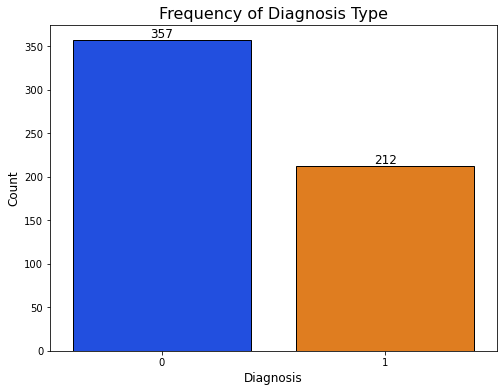

Total Values: 569


In [17]:
#Plotting a Countplot to Explore the Label column
plt.figure(figsize=(8, 6))
sns.countplot(df['diagnosis_M'], palette='bright', edgecolor='black') 

# Adding a title and labels to the plot
plt.title('Frequency of Diagnosis Type', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding annotations to the bars
for i in range(len(df['diagnosis_M'].value_counts())):
    count = df['diagnosis_M'].value_counts()[i]
    label = count
    plt.annotate(label, (i, count), ha='center', va='bottom', fontsize=12)
    

plt.show()

#Getting the total values
print(f'Total Values:',  df.diagnosis_M.count()) 

> # Corrolation

In [18]:
#Creating a new variable witout he label column 'diagnosis_M'
df2 = df.drop(columns='diagnosis_M') 
df2.head()  #Checking the dataset if the label columns is droped in the new varibale

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


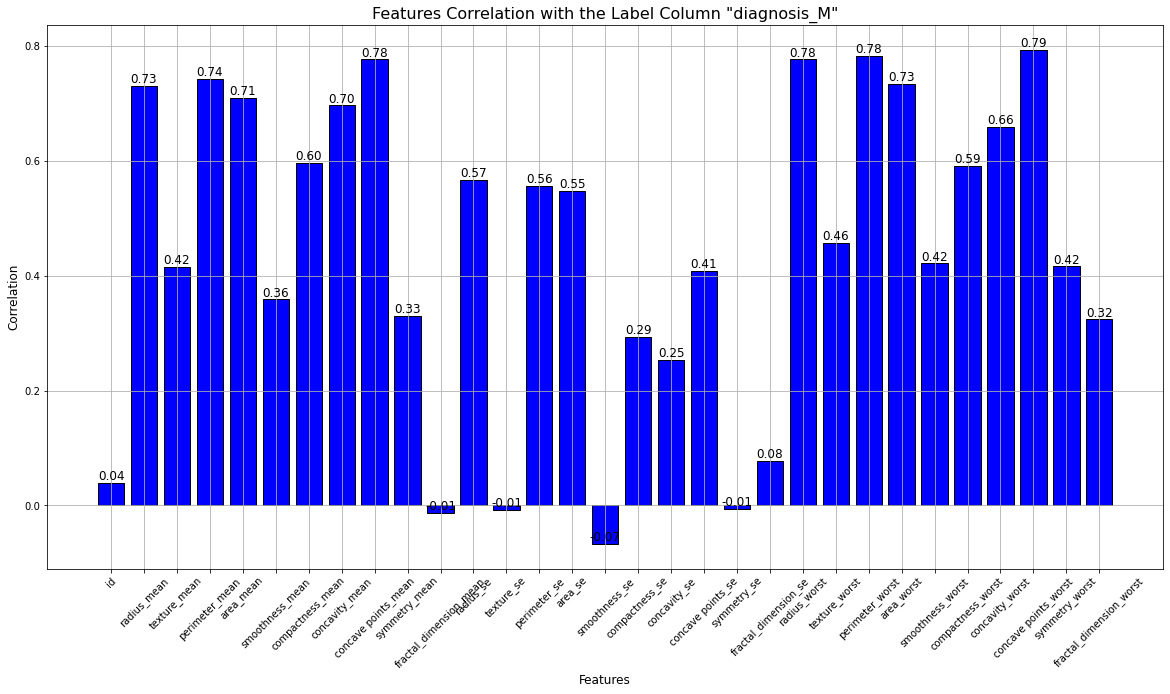

In [19]:
# Computing the correlation between the features and the label column
corrw = df2.corrwith(df['diagnosis_M'])

# Plotting the bar chart using matplotlib
plt.figure(figsize=(20, 10))
plt.bar(corrw.index, corrw.values, color='blue', edgecolor='black')

# Adding title, labels, and grid to the plot
plt.title('Features Correlation with the Label Column "diagnosis_M"', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Adding annotations to the bars
for i, value in enumerate(corrw.values):
    label = f"{value:.2f}"
    plt.annotate(label, (i, value), ha='center', va='bottom', fontsize=12)

# Displaying the plot
plt.show()

Text(158.09375, 0.5, 'Features')

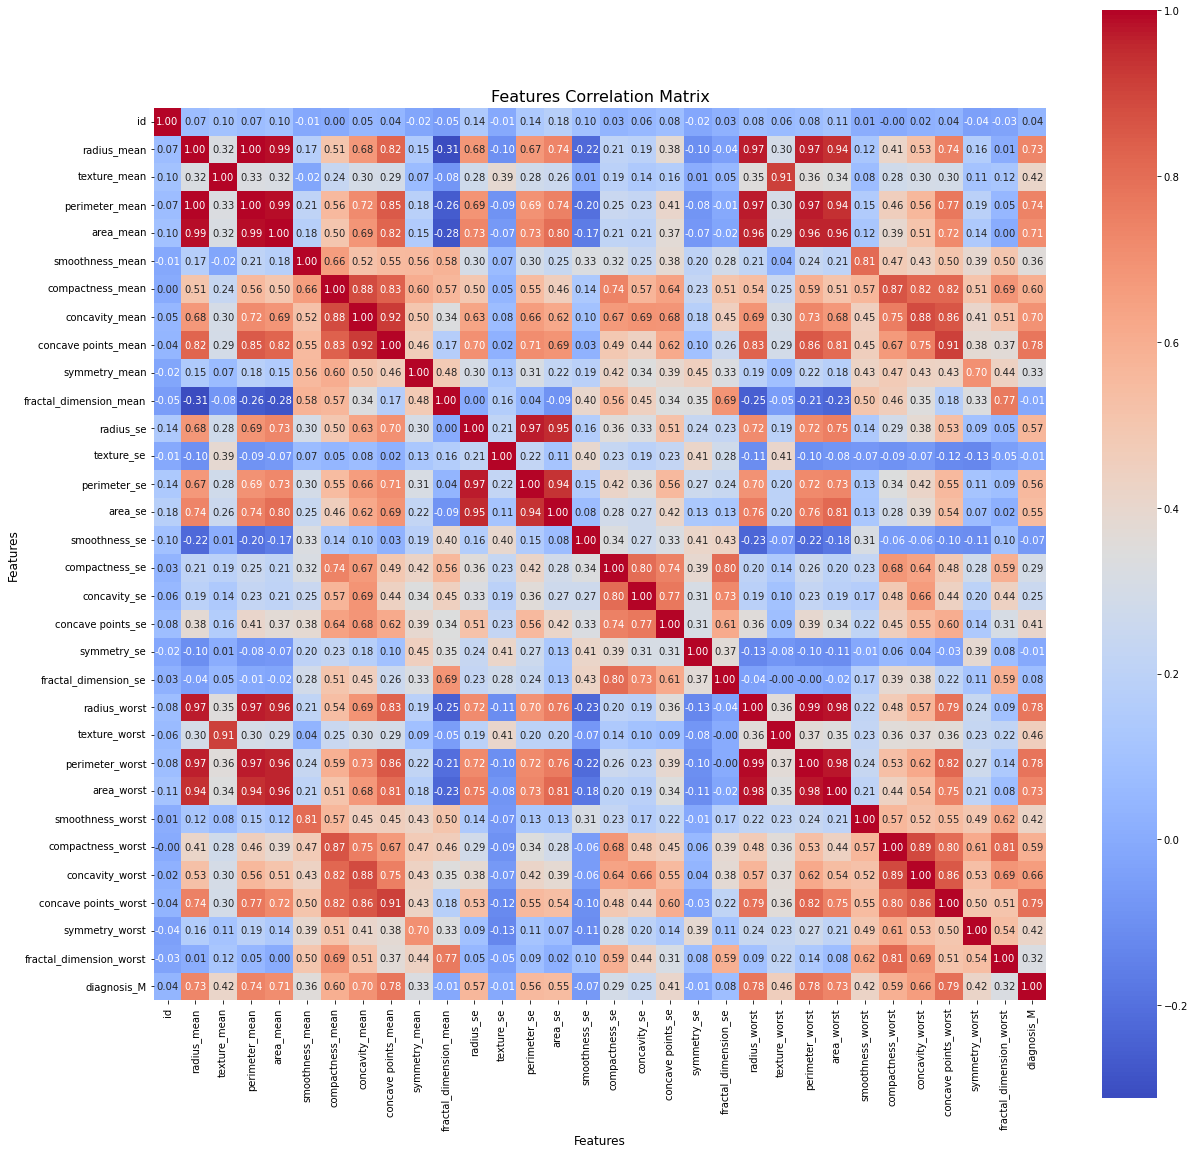

In [20]:
# Plotting a Heatmap to see in depth corrolation 
corr = df.corr()  #Defining a corrolation variavle (Corrolation Matrix)
plt.figure(figsize=(20,20))   
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True)

# Adding title and labels to the plot
plt.title('Features Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

> # Splitting the Dataset

In [21]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [22]:
X = df.iloc[:, 1:-1].values # defing the Features/Independent Variable 
y = df.iloc[:,-1].values # defing the Label/Dependent/Target Variable 

In [23]:
print(f'Features X: ',X.shape) #Printing the Features Shape
print(f'Label Y : ',y.shape)  #Printing the Labels Shape

Features X:  (569, 30)
Label Y :  (569,)


In [24]:
# spitting the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #Applying Train & Test split

In [25]:
print(f'X_train',X_train.shape)  #Printing the X_train Features Shape
print(f'y_train',y_train.shape)  #Printing the y_train Labels Shape
print(f'X_test',X_test.shape)    #Printing the X_test Features Shape
print(f'y_test',y_test.shape)    #Printing the y_test Labels  Shape

X_train (455, 30)
y_train (455,)
X_test (114, 30)
y_test (114,)


> # Feature Scaling 

In [26]:
ss= StandardScaler() #Defing the Ss variable as StandardScaler
X_train = ss.fit_transform(X_train) #Appling the fit Transform on the X_train 
X_test = ss.transform(X_test) #Appling only transform on X_test to avoid Overfitting 

In [27]:
X_train #Checking if the X_train is scalled 

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

# Building the Model 

> # Logistic Regression

In [28]:
# Model Building
clf_lr = LogisticRegression(random_state=0) #Creating the Logistic Regression Model
clf_lr.fit(X_train, y_train)                #Training the Model with X_train & y_train
pred = clf_lr.predict(X_test)                #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
results = pd.DataFrame([['Logistic Regression', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

#Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447


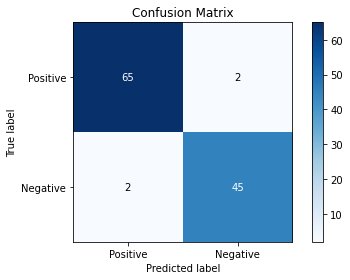

In [29]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [30]:
# Cross Validation
accuracies = cross_val_score(estimator=clf_lr, X=X_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 97.80676328502416
Standard Deviation is: 1.9770439179502723


> # Random Forest

In [31]:
#Building the model 
clf_rf = RandomForestClassifier(random_state=0)#Creating the Random Forest Classifier Model
clf_rf.fit(X_train, y_train)                   #Training the Model with X_train & y_train
pred = clf_rf.predict(X_test)                  #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
rf_results = pd.DataFrame([['Random Forest Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
results = results.append(rf_results, ignore_index=True)


#Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447
1,Random Forest Classifier,0.964912,0.958333,0.978723,0.938776


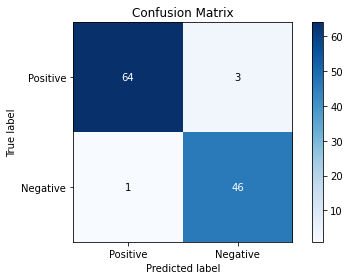

In [32]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [33]:
# Cross Validation
accuracies = cross_val_score(estimator=clf_rf, X=X_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 96.04830917874396
Standard Deviation is: 3.070184187614762


> # Random Search to Find the best parameters 

In [34]:
#Defining the Parameters 
params = {'penalty':['l1', 'l2', 'elasticnet'],
          'C': [0.25, 0.50, 0.75, 1.0, 1.25, 1.50, 1.75, 2.0],
          'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}

#Tuning the randomized Search CV
rand_search = RandomizedSearchCV(estimator=clf_lr, 
                                 param_distributions=params, 
                                 n_iter=10,
                                 scoring='roc_auc',
                                 n_jobs=-1,
                                 cv=10,
                                verbose=3)

#Training the Model 
rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [35]:
#Getting the best estimators, score & parameters
print(f'Best Est:  ',rand_search.best_estimator_)
print(f'Best Score: ',rand_search.best_score_)
print(f'Best Params: ', rand_search.best_params_)

Best Est:   LogisticRegression(C=0.75, random_state=0, solver='saga')
Best Score:  0.9958924949290061
Best Params:  {'solver': 'saga', 'penalty': 'l2', 'C': 0.75}


# Final Model 

In [36]:
# Model Building
final_clf = LogisticRegression(C=1.25,           #Creating the Logistic Regression Model
                            penalty='l1', 
                            random_state=0, 
                            solver='saga')   
final_clf.fit(X_train, y_train)                 #Training the Model with X_train & y_train
pred = clf_lr.predict(X_test)                #Predicting the X_test 

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score 
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score 
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix 

#Defining a DataFrame 
model_results = pd.DataFrame([['Final Logistic Regression', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

results = results.append(model_results, ignore_index=True)
#Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447
1,Random Forest Classifier,0.964912,0.958333,0.978723,0.938776
2,Final Logistic Regression,0.964912,0.957447,0.957447,0.957447


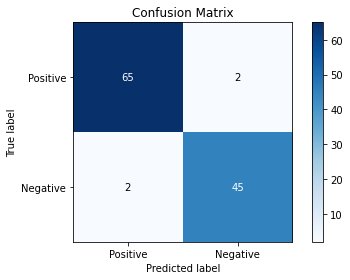

In [37]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [38]:
# Cross Validation
accuracies = cross_val_score(estimator=final_clf, X=X_train, y=y_train, cv=10) 
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 98.02415458937197
Standard Deviation is: 2.0838510173862965


# Predicting unknown values of Patents

In [39]:
pd.options.display.max_columns = None # to see all the columns
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [40]:
unknown_patent= [[12.69, 8.58, 112.90, 1091.0, 0.18840, 0.28760, 0.3801, 0.19710, 0.2419, 0.07871, 1.0950, 0.9053, 8.589, 153.90, 0.006099, 0.04904, 0.06373, 0.01597, 0.02003, 0.006093, 26.38, 17.33, 184.60, 2010.0, 0.1622, 0.6696, 0.7119, 0.2854, 0.4901, 0.10890]]

In [41]:
final_clf.predict(ss.transform(unknown_patent))

array([1], dtype=uint8)

## The END..

`If you found my work to be informative and valuable, I would greatly appreciate it if you could take a moment to upvote this notebook. Your support not only motivates me to continue creating and sharing my work, but also helps it reach a wider audience. Thank you in advance for your time and consideration.`